In [1]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import io, base64
import numpy as np
# from html_table import h_table
from time import time


In [2]:
# bracket thresholds
b0 = [0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60]
# rates
r0 = [0, 0.05, 0.125, 0.20, 0.275, 0.35, 0.425, 0.50, 0.575, 0.65, 0.725 ]


In [3]:
# %load ad-tax
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
# from html-table import h_table 
# from IPython.display import display, HTML

def ar(x: float, b: list, r: list):
    """
    Calculate the average tax rate

    Parameters
    ----------
    x, revenue 
    b, list of tax brackets
    r, corresponding list of tax rates 
    
    Returns
    -------
    average tax rate 
    """
    bl = b
    bu = (b[1:] + [np.inf])
    
    tp_bl = [0] + [ (bu[j]-bl[j]) * r[j] for j in range(0,len(b)-1) ]
    tp_cum = np.array(tp_bl).cumsum()

    a = 0
    for j in range(len(b)):
        if bl[j] < x and x <= bu[j]:
            a = ( (x - bl[j]) * r[j] + tp_cum[j] ) / x
    return a

def us_revenue():
    """
    Returns a dict with company names as keys and a list of revenue 2018-2023 as value.
    """
    return {
        "Amazon":     [7405535228.00,10319981126.00,15734930757.00,20471812845.12,26203920441.75,31968782938.94],
        "Facebook":     [24522653399.57,31266383084.45,38301319278.45,48475395994.50,57064562199.66,65375870105.82],
        "Google":     [36476873676.10,41799332909.88,44064482272.17,54933079215.58,60698189040.49,66472154111.69],
        "Hulu":     [1455200000.00,1951136805.00,2550075570.00,3390134249.43,4169865126.80,4982988826.52],
        "IAC":     [502800960.82,617207582.40,545000828.13,602225915.08,641370599.56,670232276.54],
        "Microsoft":     [4564720620.05,5294834699.31,5559599013.53,6654598018.60,7508823966.43,8301276813.48],
        "Reddit":     [76903200.00,103047001.20,176918167.48,247889909.99,315471183.58,373751216.05],
        "Roku":     [290441250.00,528408003.20,825367180.00,1461385859.79,2062842763.21,2743812995.34],
        "Snapchat":     [668196016.99,877990946.26,1253547960.84,1824657820.00,2495205459.02,3333581435.90],
        "Spotify":     [364553024.33,449755501.87,519348412.82,698564719.72,873205899.65,1030382961.59],
        "Twitter":     [1321202682.67,1604259465.12,1696783197.53,2206578767.25,2560867054.12,2752932083.18],
        "Verizon Media":     [3450212340.50,3360506819.64,3181279789.26,3435782172.40,3641929102.75,3787606266.86],
        "Yelp":     [894316739.97,963248050.00,825245505.00,918212191.63,1012078012.83,1072802693.60],
    }

def table_marg_rates(b, r):
    
    bl = b
    bu = (b[1:] + [np.inf])

    row_list = []
    row_list.append(f" For Revenue Between " + " " * 5 + "Marginal Tax Rate" + " " * 2)

    for j in range(len(b)):
        l = b[j]
        u = bu[j]
        t = r[j]
        if u == np.inf:
            row_list.append(" " * 6 + f"Above {l:>3} billion {t:>17.1%}" + " " * 8)
        else:
            row_list.append(" " * 5 + f" {l:>2} and {u:>2} billion {t:>17.1%}" + " " * 8)

    return h_table(row_list, font_size=12, row_margin = "4px", display_html = False, return_html = True)
    
    
def table_tax_paid_by_firm(b, r):
    us_rev = us_revenue()
    us_rev_l = list(us_rev.items())
    us_rev_s = sorted(us_rev_l, key=lambda company: company[1][3], reverse = True)
    us_names = [ company[0] for company in us_rev_s ]
    us_rev_2021 = np.array([ company[1][3] / 10**9 for company in us_rev_s ])
    us_avg_r = np.array([ ar(x, b, r) for x in us_rev_2021 ]) 
    tax_paid = np.array([ a * r for a, r in zip(us_avg_r, us_rev_2021)])
    
    row_list = []
    fm = "Firm"
    tp = "Tax Paid"
    row_list.append(f"{fm: ^15}  {tp: ^15}")
    for n, t in zip(us_names, tax_paid):
        row_list.append(f"{n: <15} {t:^15.1f}")
    total = tax_paid.sum()
    n = "Total"
    row_list.append(f"{n: <15} {total:^15.1f}")

    return h_table(row_list, font_size=12, row_margin = "4px", display_html = False, return_html = True)

    
def table_tax_paid_total(b, r):
    us_rev = us_revenue()

    us_rev_l = list(us_rev.items())
    us_rev_s = sorted(us_rev_l, key=lambda company: company[1][3], reverse = True)
    us_names = [ company[0] for company in us_rev_s ]
    us_rev_a = np.array([ np.array(company[1]) / 10**9 for company in us_rev_s ])
    avg_r_a = np.array([ [ar(x, b, r) for x in rev_list ] for rev_list in us_rev_a ]) 
    
    tax_payments = (avg_r_a * us_rev_a).sum(0)
    
    row_list = []
    year = "Year"
    tr = "Tax Receipts"
    b = "(billion)"
    blank = ""
    row_list.append(f"{year: ^10} {tr: ^15}")
    row_list.append(f"{blank: ^10} {b: ^15}")
    
    for j in range(6): 
        row_list.append(f"{j+2018: ^10d} {tax_payments[j]: ^15.1f}")
    
    return h_table(row_list, header_rows = 2, font_size=12, row_margin = "4px", display_html = False, return_html = True)    

base_style = {
    'figure.dpi':                   300,  # in a notebook, higher dpi makes the graph larger   
    'figure.figsize':  [3*1.6180339, 3],  # constrain the size and use the golden ratio to set the size
    'figure.facecolor':         'white',
    'figure.titlesize':               8,
    'axes.titlesize':                 8,  # the default font sizes have to be smaller bc of the higher dpi
    'axes.labelsize':                 6,
    'ytick.labelsize':                5,
    'xtick.labelsize':                5,
    'legend.fontsize':                5,
    'lines.linewidth':                1,
    'lines.markersize':               3,
    'xtick.major.size':             2.0,
    'xtick.major.width':            0.3,
    'ytick.major.size':             2.0,
    'ytick.major.width':            0.3,
}

def floating_spines(ax, axis = 'l'):
    """[summary]

    Parameters
    ----------
    ax : [type]
        [description]
    axis : str, optional
        [description], by default 'l'

    Returns
    -------
    [type]
        [description]
    """
    ax.spines['top'].set_visible(False)
    if axis == 'l':
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(True)
        ax.spines['left'].set_linewidth(0.2)
        ax.spines['left'].set_position(('outward', 5))
    else:
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(True)
        ax.spines['right'].set_linewidth(0.2)
        ax.spines['right'].set_position(('outward', 5))

    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_linewidth(0.2)
    ax.spines['bottom'].set_position(('outward', 5))
    return ax

def us_fig(b: list, r: list):
    """
    """

    us_rev = us_revenue()

    us_rev_l = list(us_rev.items())
    us_rev_s = sorted(us_rev_l, key=lambda company: company[1][3], reverse = True)
    us_names = [ company[0] for company in us_rev_s ]
    us_rev_2021 = np.array([ company[1][3] / 10**9 for company in us_rev_s ])
    us_avg_r = np.array([ ar(x, b, r) for x in us_rev_2021 ]) 
        
    rev_for_line = range(60)
    ar_for_line = [ar(x, b, r) for x in rev_for_line]
    
    adjustments = [
            (+0.5, -1.5, "", 0),
            (+0.5, -1.5, "", 1),
            (+0.5, -1.5, "", 2),
            (+1.0, -1.0, "", 3),
            (+2.0, -1.5, "All others", 4)
        ]
    
    with plt.style.context(base_style):
        fig = plt.figure()
        ax = fig.add_axes([0.1, 0.15, 0.8, 0.75])
        ax = floating_spines(ax)
        ax.set_xlim(-1, 60)
        ax.set_ylim(-0.01, 0.5)
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax = 1.0, decimals = 0))
        ax.spines['left'].set_bounds(low = 0, high = 0.5)
        ax.spines['bottom'].set_bounds(low = 0, high = 60)
        ax.plot(rev_for_line, ar_for_line)
        ax.plot(us_rev_2021, us_avg_r, ls = '', marker = 'o', ms = 1.5)
        for j in range(len(adjustments)):
            if adjustments[j][2] == "All others":
                ax.text(
                    us_rev_2021[j] + adjustments[j][0], 
                    us_avg_r[j] + adjustments[j][1]/100, 
                    adjustments[j][2], fontsize = 6
                ) 
            else:  
                ax.text(
                    us_rev_2021[j] + adjustments[j][0], 
                    us_avg_r[j] + adjustments[j][1]/100, 
                    us_names[j] + adjustments[j][2], fontsize = 6
                ) 

        ax.set_title("Average Tax Rate as a Function of Total Revenue", pad = 10)
        ax.axes.xaxis.set_label_text("US Revenue 2021, Billion USD per Year")

    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img_str = 'data:image/png;base64,' + base64.b64encode(buf.read()).decode('UTF-8')
    # Uncomment the line below to generate the default png files 
    fig.savefig("../graphs/fig-us-default.png")    
    return img_str

def split(s, b, r, revenue = 50):
    tax_bill = s * (ar(revenue/s, b, r)* revenue/s)
    return f"${tax_bill: <2.1f} billion"


def ww_fig(b,r):
    """
    """
    ww_rev_for_graph = range(150)
    ww_ar_for_graph = [ar(x, b, r) for x in ww_rev_for_graph]

    ww_rev = {
        "Amazon": 26309972874.28,
        "Facebook": 107723102210.00,
        "Google": 130145195979.30,
        "IAC": 734739747.00,
        "Microsoft": 8960366731.10,
        "Reddit": 261098903.52,
        "Snapchat": 3206780000.00,
        "Spotify": 1100807642.44,
        "Twitter": 4028869581.75,
        "Verizon Media": 4589668440.03,
        "Yelp": 929364566.42,
    }

    ww_rev_l = list(ww_rev.items())
    ww_rev_s = sorted(ww_rev_l, key=lambda company: company[1], reverse = True)
    ww_names = [ company[0] for company in ww_rev_s ]
    ww_rev_2021 = [ company[1]/10**9 for company in ww_rev_s ]
    ww_avg_r = [ ar(x, b, r) for x in ww_rev_2021]
        
    adjustments = [
        (+1, -2.5, "", 0),
        (+1, -2.5, "", 1),
        (+1, -2.5, "", 2),
       (+2.0, -2, "All others", 3)
    ]
    with plt.style.context(base_style):
        fig = plt.figure()
        ax = fig.add_axes([0.1, 0.15, 0.8, 0.75])
        ax = floating_spines(ax)
        ax.set_xlim(-1, 150)
        ax.set_ylim(-0.01,0.5)
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax = 1.0, decimals = 0))
        ax.spines['bottom'].set_bounds(low = 0, high = 150)
        ax.spines['left'].set_bounds(low = 0, high = 0.5)
        ax.plot(ww_rev_for_graph, ww_ar_for_graph)
        ax.plot(ww_rev_2021, ww_avg_r, ls = '', marker = 'o', ms = 1.5)
        for j in range(len(adjustments)):
            if adjustments[j][2] == "All others":
                ax.text(ww_rev_2021[j] + adjustments[j][0], ww_avg_r[j] + adjustments[j][1]/100, adjustments[j][2], fontsize = 6) 
            else:  
                ax.text(
                    ww_rev_2021[j] + adjustments[j][0],
                    ww_avg_r[j] + adjustments[j][1]/100, 
                    ww_names[j] + adjustments[j][2], 
                    fontsize = 6
                ) 

        ax.set_title("Average Tax Rate as a Function of Total Revenue", pad = 10)
        ax.axes.xaxis.set_label_text("Worldwide Revenue 2021, Billion USD per Year")
            
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img_str = 'data:image/png;base64,' + base64.b64encode(buf.read()).decode('UTF-8')
    # Uncomment the line below to generate the default png files 
    fig.savefig("../graphs/fig-ww-default.png")
    return 


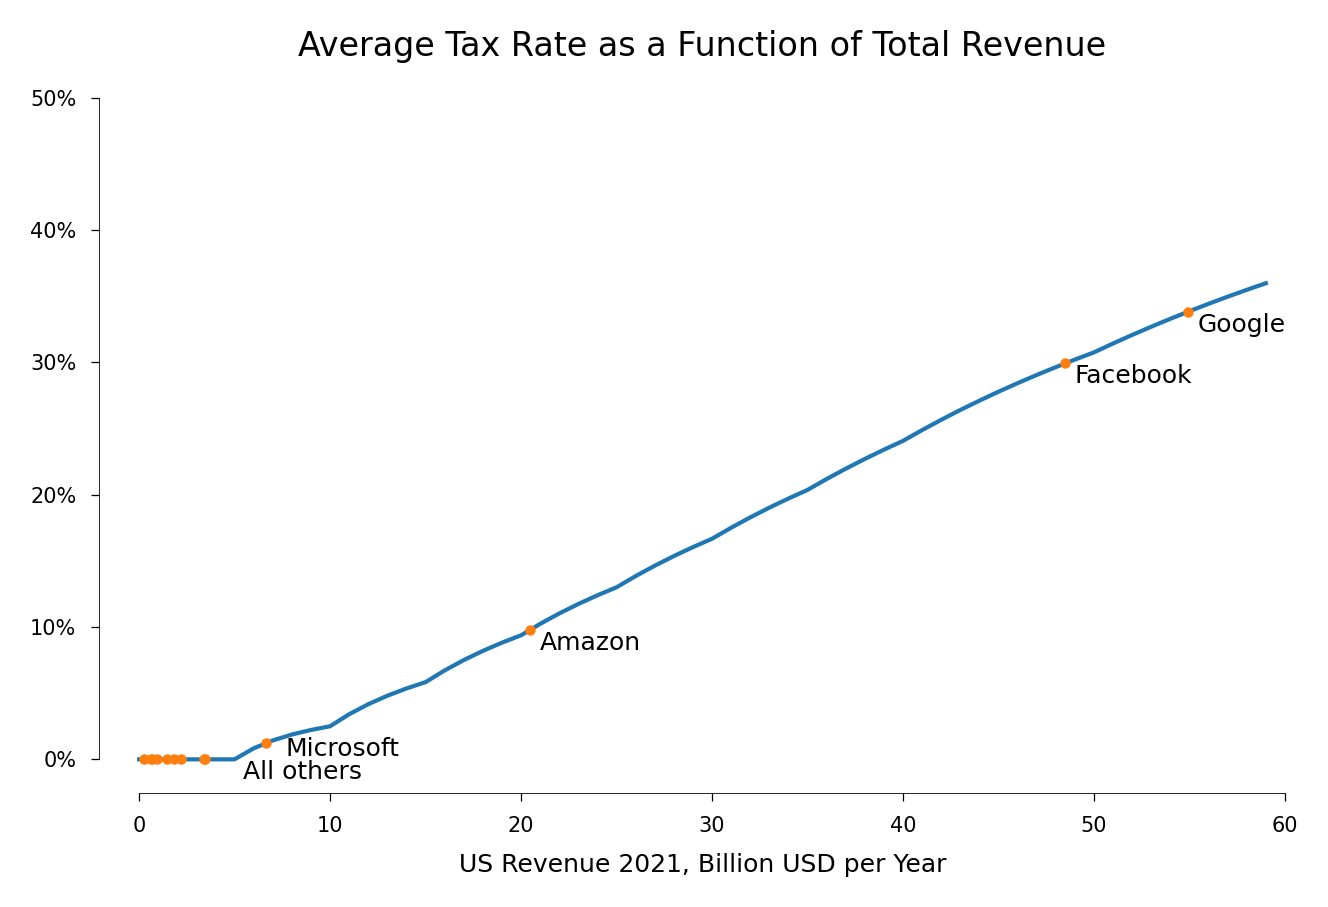

In [4]:
us_img_str = us_fig(b0,r0)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 100, 120]


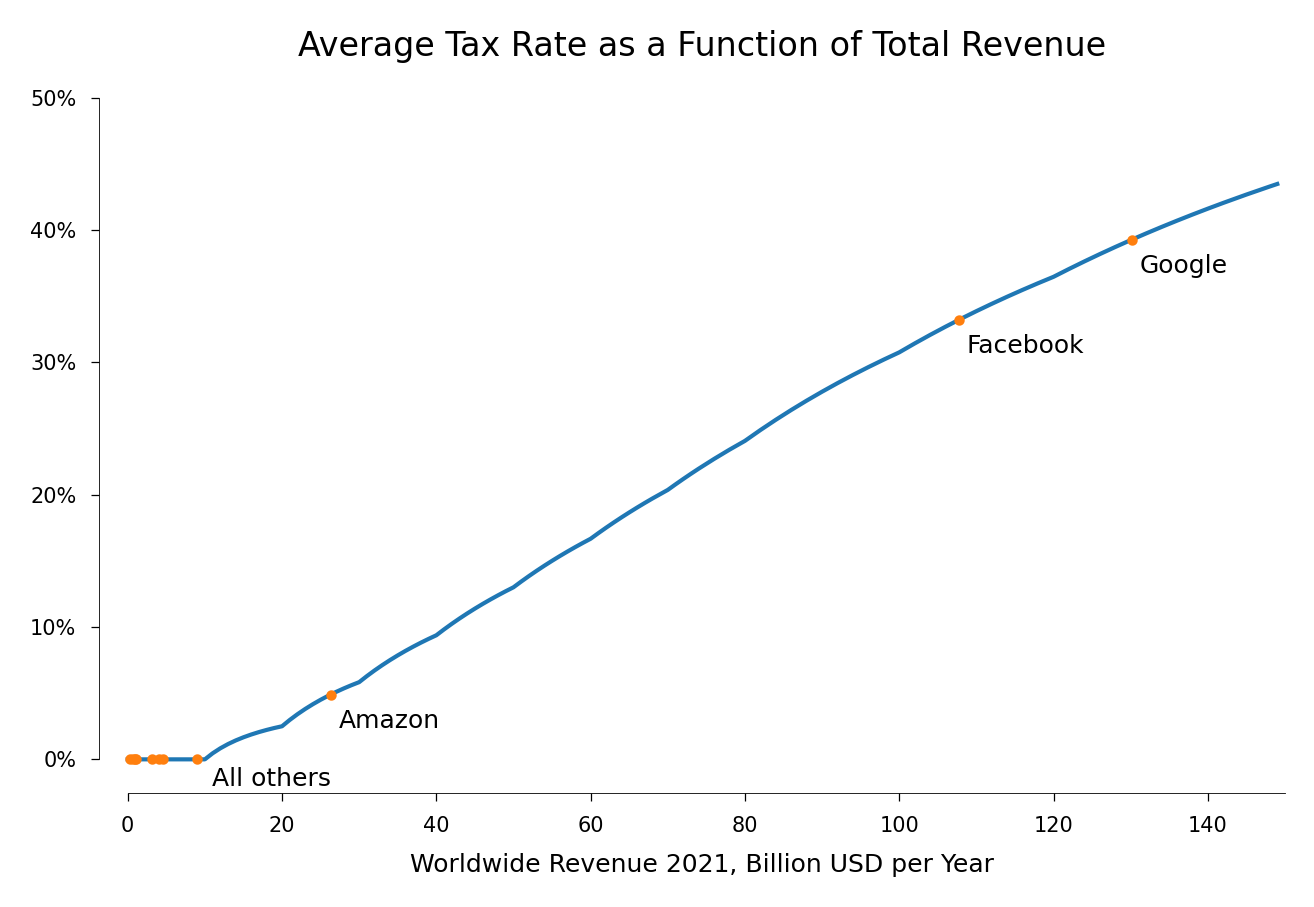

In [5]:
b2 = [ 2* bracket for bracket in b0]
print(b2)
ww_img_str = ww_fig(b2,r0)